In [375]:
import matplotlib.pyplot as plt
import numpy as np
import json
import random
import itertools

In [376]:
training_challenge_dict = json.load(open('../data/RAW_DATA_DIR/arc-prize-2024/arc-agi_training_challenges.json'))
training_solutions_dict = json.load(open('../data/RAW_DATA_DIR/arc-prize-2024/arc-agi_training_solutions.json'))

In [377]:
# find random keys from the training_challenge_dict
random_keys = list(training_challenge_dict.keys())
n = random.randint(0, len(random_keys))

## Difficult problems
- a64e4611

Challenge key: 8be77c9e


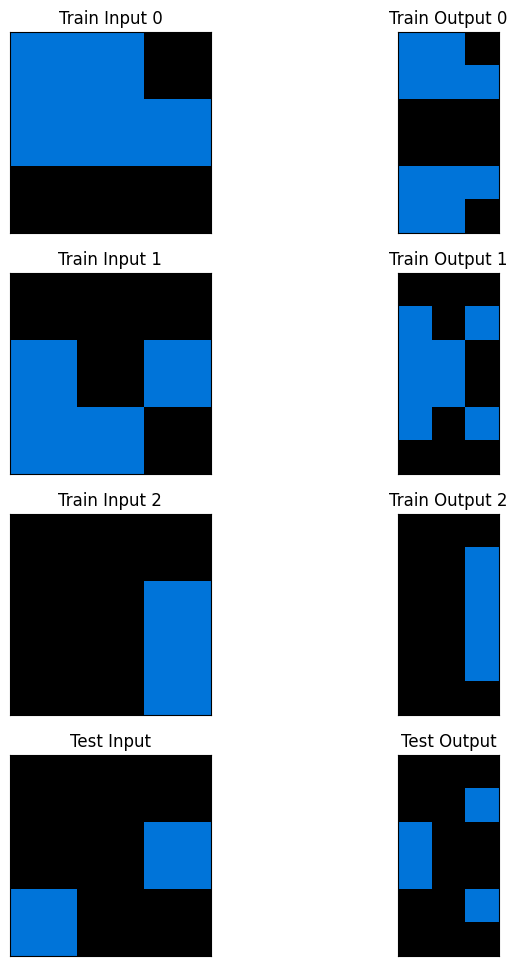

In [378]:
# import the display_challenge function
from dsl.utilities.plot import display_challenge, plot_grid

# find the first challenge and solution
challenge_key = '1f85a75f'
challenge_key = random_keys[n]
first_challenge = training_challenge_dict[challenge_key]
first_solution = training_solutions_dict[challenge_key]

print(f'Challenge key: {challenge_key}')

# display the challenge
display_challenge(challenge_key)

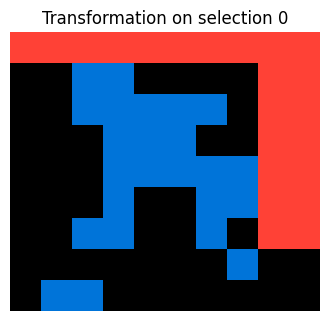

In [379]:
arr = np.array([
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 1, 1, 0, 0, 0, 0, 2, 2],
       [0, 0, 1, 1, 1, 1, 1, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 0, 0, 2, 2],
       [0, 0, 0, 1, 1, 1, 1, 1, 2, 2],
       [0, 0, 0, 1, 0, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 0, 0, 1, 0, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

# plot the array as an image
plot_grid(arr)

In [380]:
from dsl.color_select import ColorSelector

colsel = ColorSelector()

popular_color = colsel.mostcolor(arr)
print(f'Most popular color: {popular_color}')
least_popular_color = colsel.leastcolor(arr)
print(f'Least popular color: {least_popular_color}')

second_most_popular_color = colsel.rankcolor(arr, 1)
print(f'Second most popular color: {second_most_popular_color}')

color_of_second_biggest_shape = colsel.rank_largest_shape_color_nodiag(arr, 1)
print(f'Color of second biggest shape: {color_of_second_biggest_shape}')

color_of_second_biggest_shape = colsel.rank_largest_shape_color_diag(arr, 1)
print(f'Color of second biggest shape: {color_of_second_biggest_shape}')

Most popular color: 0
Least popular color: 2
Second most popular color: 1
Color of second biggest shape: 2
Color of second biggest shape: 1


Selecting by color


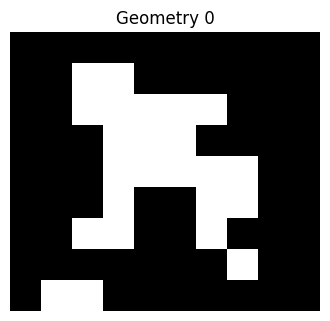

Selecting colored rectange combinations


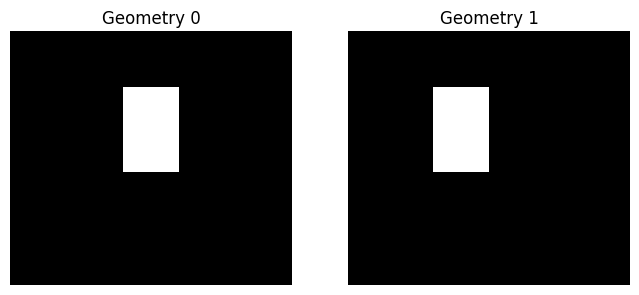

Selecting colored separated shapes


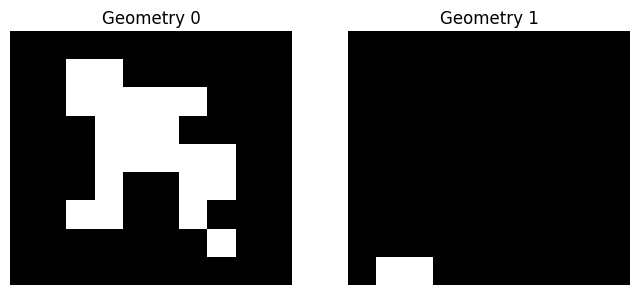

Selecting cells adjacent to color


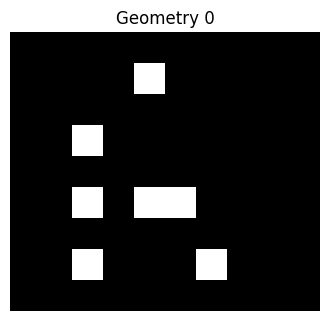

In [381]:
from dsl.select import Selector
from dsl.utilities.plot import plot_selection
sel = Selector(arr.shape)

print('Selecting by color')
selection = sel.select_color(arr, 1)
plot_selection(selection)
print('Selecting colored rectange combinations')
selection2 = sel.select_colored_rectangle_combinations(arr, 1, 3, 2)
plot_selection(selection2)
print('Selecting colored separated shapes')
selection3 = sel.select_colored_separated_shapes(arr, 1)
plot_selection(selection3)
print('Selecting cells adjacent to color')
selection4 = sel.select_adjacent_to_color(arr, 1, 2)
plot_selection(selection4)

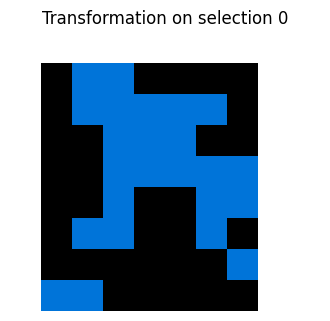

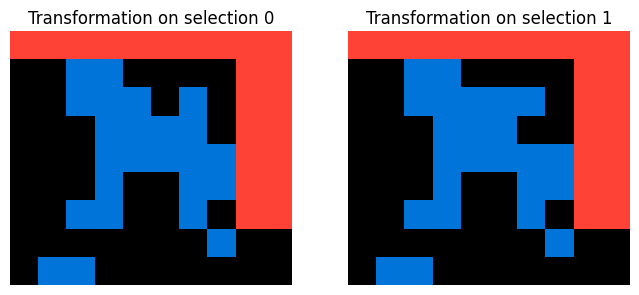

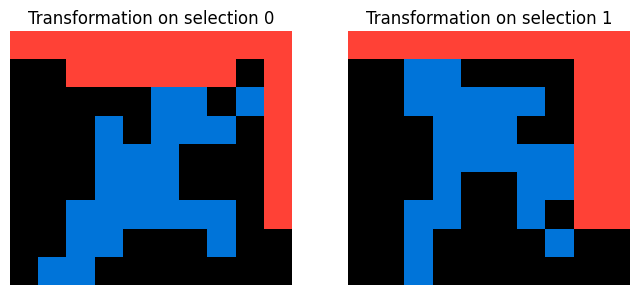

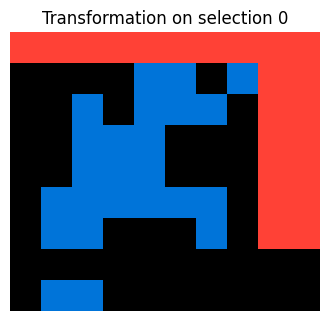

In [382]:
from dsl.transform import Transformer
from dsl.utilities.plot import plot_grid_3d

trn = Transformer()

transformed = trn.crop(arr, selection)
plot_grid_3d(transformed)

transformed2 = trn.rotate(arr, selection2, 1)
plot_grid_3d(transformed2)

transformed3 = trn.rotate(arr, selection3, 1)
plot_grid_3d(transformed3)

transformed4 = trn.rotate(arr, selection4, 1)
plot_grid_3d(transformed4)

In [383]:
from scipy.ndimage import label

arr = np.array([
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 2],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

labels, nlabels = label(arr)
print(labels)


[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 0 2]
 [0 0 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 4 4 0 0 0 0 0 0 0]]


Random index: 3
Random challenge: {'input': [[4, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 4, 4]], 'output': [[4, 0, 4], [0, 0, 0], [4, 4, 4]]}


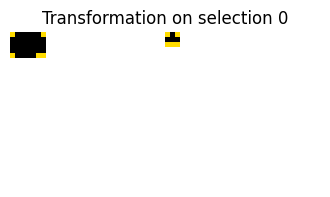

In [384]:
from enviroment import ARCEnviroment

env = ARCEnviroment(training_challenge_dict, training_solutions_dict)
grid = env.get_random_challenge()
plot_grid(grid)